<a href="https://colab.research.google.com/github/kleeresearch/TextAnalysis/blob/master/Course/Day2/1_Copy_of_Kr_frequency_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 23.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.16.0-py3-none-any.whl size=30813256 sha256=6888f06046bdfa59e8627ef862b1cdfc477261920292a956629b5ca5e4b6c7fe
  Stored in directory: /root/.cache/pip/wheels/6b/03/2b/ac2c97cc65ebd9df3516f4b900adc2f0a744df8d1375b2e2ef
Successfully built kiwipiepy-model


In [ ]:
from kiwipiepy import Kiwi
import re
kiwi = Kiwi()
from kiwipiepy.utils import Stopwords
stopwords = Stopwords()

# 사용자 정의 불용어를 키위 형태소 분석기의 불용어 사전에 추가하기
customized_stopwords = ['기사제보', '연합뉴스', '재배포', '사진구매']
for word in customized_stopwords:
    stopwords.add((word, 'NNG'))

kiwi 형태소분석기에서 제공하는 불용어 사전을 준비한다.
사전에 추가적인 불용어를 등록한다. 기사제보, 연합뉴스 등
전처리를 위한 사용자 정의 함수 do_Kr_preprocessing 펑션을 만든다.
한글 텍스트 데이터 전처리에 필요한 코드들이 있다.



In [ ]:
def do_Kr_preprocessing(text):
    filtered_content = re.sub('[^\s\w\d]',' ', content) #기호를 제거
    kiwi_tokens = kiwi.tokenize(filtered_content, stopwords=stopwords) #토큰화를 통해 형태소 분석, 불용어 제거
    Noun_words = [] #명사의 단어들을 추출
    for token in kiwi_tokens:
        if 'NN' in token.tag:
            Noun_words.append(token.form)
    # 길이가 1인 단어 제거 하기
    final_Noun_words = []
    for word in Noun_words:
        if len(word)>1:
            final_Noun_words.append(word)
    return final_Noun_words

영어와 달리 한글은 폰트 파일의 경로를 명확히 지정해줘야 한다.

In [ ]:
with open('/content/drive/MyDrive/KOSSDA_텍스트마이닝_강의자료/강의자료/Day1/python_code/naver_news.txt', 'r', encoding='utf8') as f:
    content = f.read()

In [ ]:
print(content)

북미정상회담 '빅딜' 윤곽, 북 비핵화, 북미 제제 해제 (PG)[제작 최자윤] 일러스트, 사진합성北, 단계적 조치 요구…美, 이행기간 압축한 '큰 거래' 원해 폼페이오·볼턴, 연일 美 밑그림 소개…北, 구체적 답변안해



트럼프 미 대통령과 김정은 북한 국무위원장[워싱턴DC EPA=연합뉴스 자료사진](서울=연합뉴스) 조준형 기자 = 다음 달 12일 싱가포르에서의 도널드 트럼프 대통령과 김정은 국무위원장 간 '세기의 회담'을 앞둔 가운데 북미 '빅딜'의 윤곽이 드러나고 있다.     밑그림은 트럼프 미 행정부의 외교안보 핵심인사들의 입을 통해 소개되고 있으나, 이에 대해 북한은 구체적으로 반응하지 않고 있다.    지금까지 나온 이들의 발언을 종합해보면 북미 빅딜의 골자는 트럼프 대통령의 첫 임기 사실상 마지막 해인 2020년까지 북한이 비핵화를 달성하면, 미국은 국제사회의 대북 투자와 경협을 막는 각종 제재를 해제하고 북미 수교와 평화협정을 체결하는 등의 내용인 것으로 보인다.    트럼프 행정부에선 존 볼턴 백악관 국가안보보좌관과 마이크 폼페이오 국무장관이 서로 역할 분담해 대북 메시지를 날리고 있다. 볼턴 보좌관이 채찍을 들고 철저한 비핵화에 방점을 두고 있다면 폼페이오 장관은 비핵화 때 제공할 당근을 제시한다.    우선 볼턴 보좌관은 13일(현지시간) 북한의 '영구적이고 검증 가능하며 불가역적인 비핵화(PVID)'를 위해 북한의 우라늄 농축과 플루토늄 재처리능력이 완전히 제거돼야 한다고 밝히는 한편 핵무기를 폐기해 미국으로 반출하는 방안을 제시했다.     더욱이 핵무기 해체를 미국 주도로 할 것임을 분명히 하면서 "매우 빨리하기를 바란다"고 밝혔다.      핵무기의 원료인 플루토늄과 고농축우라늄(HEU)을 생산하는 시설을 제거하는 것은 물론 북한이 보유한 핵무기까지 조기에 폐기해서 미국에 넘기는 방안이다. 한마디로 미국의 손에 북한 핵무장 해제를 맡길 것을 요구하는 것이다. 볼턴 보좌관은 핵무기에 생화학무기까지 거론하며 대량살상무기(WMD)를 모

In [ ]:
final_nouns = do_Kr_preprocessing(content)

In [ ]:
print(final_nouns)

['북미', '정상', '회담', '빅딜', '윤곽', '비핵화', '북미', '제제', '해제', '제작', '자유', '일러스트', '사진', '합성', '단계', '조치', '요구', '이행', '기간', '압축', '거래', '폼페이오', '볼턴', '밑그림', '소개', '구체', '답변', '트럼프', '대통령', '김정은', '북한', '국무', '위원장', '워싱턴DC', '연합뉴스', '자료', '사진', '서울', '연합뉴스', '조준', '기자', '다음', '싱가포르', '도널드', '트럼프', '대통령', '김정은', '국무', '위원장', '세기', '회담', '가운데', '북미', '빅딜', '윤곽', '밑그림', '트럼프', '행정부', '외교', '안보', '핵심', '인사', '소개', '북한', '구체', '반응', '지금', '발언', '종합', '북미', '빅딜', '골자', '트럼프', '대통령', '임기', '사실', '마지막', '북한', '비핵', '달성', '미국', '국제', '사회', '대북', '투자', '경협', '각종', '제재', '해제', '북미', '수교', '평화', '협정', '체결', '내용', '트럼프', '행정부', '볼턴', '백악관', '국가', '안보', '보좌관', '마이크', '폼페이오', '국무', '장관', '역할', '분담', '대북', '메시지', '볼턴', '보좌관', '채찍', '철저', '비핵', '방점', '폼페이오', '장관', '비핵화', '제공', '당근', '제시', '볼턴', '보좌관', '현지', '시간', '북한', '영구', '검증', '가능', '가역', '비핵화', '북한', '우라늄', '농축', '플루토늄', '처리', '능력', '제거', '핵무기', '폐기', '미국', '반출', '방안', '제시', '핵무기', '해체', '미국', '주도', '핵무기', '원료', '플루토늄', '농축', '우라늄', '생산', '시설', '제거', '북한

In [ ]:
from collections import Counter
c = Counter(final_nouns)
print(c.most_common(10))

[('북한', 27), ('미국', 13), ('북미', 11), ('이행', 9), ('트럼프', 8), ('비핵', 8), ('폼페이오', 7), ('제거', 7), ('회담', 6), ('해제', 6)]


## Word Cloud

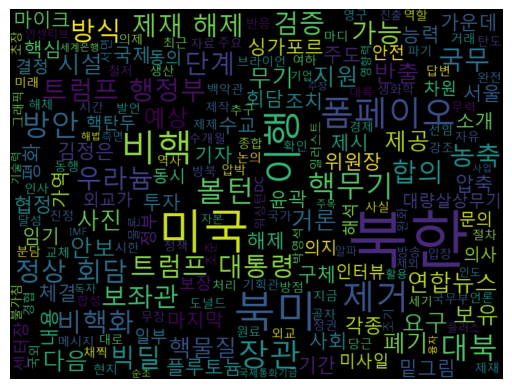

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = '/content/drive/MyDrive/KOSSDA_텍스트마이닝_강의자료/강의자료/Day2/python_code/malgun.ttf' # 한글 폰트 경로
#FONT_PATH = '/System/Library/Fonts/AppleGothic'

wordcloud = WordCloud(max_font_size=100, width=800, height=600,
                      font_path=FONT_PATH)

wordcloud.generate(' '.join(final_nouns))
# generate() 는 하나의 문자열 값을 인자로 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# wordcloud.to_file('korean.png')

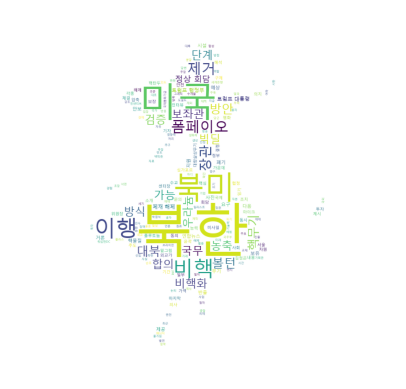

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud

# 마스크 이미지를 불러온 후, 넘파이의 어레이 형태로 변환합니다.
#image_mask = np.array(Image.open("alice_mask.png"))

image_mask = np.array(Image.open("/content/drive/MyDrive/KOSSDA_텍스트마이닝_강의자료/강의자료/Day2/python_code/alice_mask.png"))
image_mask[image_mask>0]=255
# 숫자 0은 검은색을 255는 흰색을 의미
# 완전 흰색이 아닌 부분을 흰색으로 변환
# WordCloud는 완전 흰색이 아닌 부분을 mask 로 사용하기 때문

FONT_PATH = '/content/drive/MyDrive/KOSSDA_텍스트마이닝_강의자료/강의자료/Day2/python_code/malgun.ttf'

# WordCloud() 생성자 함수의 mask 파라미터를 해당 alice_mask로 지정합니다.
wc1 = WordCloud(max_font_size=100, background_color="white",
                width=674, height=643,
                mask=image_mask,
                font_path = FONT_PATH)

# generate word cloud
wc1.generate(' '.join(final_nouns))

# store to file
wc1.to_file("alice_wc.png")

plt.figure()
plt.imshow(wc1)
plt.axis("off")
plt.show()